# Feature scalling : 

normalization :

In [92]:
#             'this perticuler scaling technique is scale down the row data 
#     int the scale of 0 to 1 (0-1) '

# formula is x_scaled = ( x - x_min)/(x_max -x_min)

# • minmaxscallig ()
# • quantile transformer (n_quantile , output_distribution = norm , uniform )
        
# • normalizer () 
# 'l1' : normalize samples using l1-form ( sum of abslute values ) 
# 'l2' : normalize samples using l2-form ( sum of squreroot values ) 


In [94]:
#             standardization is process in which scale the feature at the 
#     range of teh -1 to 1 (-1  -->  1 ) 

# formula is x_scaled = (x - mean) / standard Deviation 
#. genrally µ = 0  and S.D = 1 : 

# •standard 

In [137]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_california_housing 
from sklearn.preprocessing import MinMaxScaler , StandardScaler , Normalizer
np.random.seed(42)
x ,y = fetch_california_housing ( return_X_y = True ) 

x_train,x_test,y_train,y_Test = train_test_split(x,y,test_size = 0.3) 

standard  = StandardScaler () 
x_standard  = standard.fit_transform(x_train)
y_standard = standard.fit_transform(y_train.reshape(-1,1) ) 

normal = MinMaxScaler () 
x_norm = normal.fit_transform(x_train) 
y_norm = normal.fit_transform(y_train.reshape(-1,1)) 

quntile = QuantileTransformer (n_quantiles = 10 , output_distribution = 'normal') 
x_qunt = quntile.fit_transform(x_train) 
y_qunt = quntile.fit_transform(y_train.reshape(-1,1))

norm_l1 = Normalizer (norm = 'l1')
x_l1 = norm_l1.fit_transform(x_train)
y_l1 = norm_l1.fit_transform(y_train.reshape(-1,1))

norm_l2 = Normalizer (norm = 'l2')
x_l2 = norm_l2.fit_transform(x_train)
y_l2 = norm_l2.fit_transform(y_train.reshape(-1,1))

x_l2

array([[ 0.00337323,  0.02857842,  0.0048031 , ...,  0.00243757,
         0.02770474, -0.09636644],
       [ 0.00284436,  0.01986911,  0.00437241, ...,  0.00200093,
         0.0325754 , -0.11632368],
       [ 0.00566357,  0.03234326,  0.0075704 , ...,  0.00345657,
         0.04661472, -0.16190494],
       ...,
       [ 0.00166662,  0.02044649,  0.00226429, ...,  0.00189248,
         0.01932761, -0.06723488],
       [ 0.00321003,  0.0084191 ,  0.00358954, ...,  0.00178423,
         0.02109265, -0.06845288],
       [ 0.00098202,  0.01982726,  0.00129738, ...,  0.00080403,
         0.01440145, -0.04667795]])

In [138]:
reg_s  = LinearRegression () 
reg_s.fit(x_standard,y_standard)
y_pred_s= reg_s.predict(x_test)
y_pred_s

array([[63.35449255],
       [65.2971536 ],
       [69.01160263],
       ...,
       [62.182213  ],
       [59.77347267],
       [62.59293918]])

In [139]:
reg_n  = LinearRegression () 
reg_n.fit(x_norm,y_norm)
y_pred_n = reg_s.predict(x_test)
y_pred_n

array([[63.35449255],
       [65.2971536 ],
       [69.01160263],
       ...,
       [62.182213  ],
       [59.77347267],
       [62.59293918]])

In [140]:
reg_q  = LinearRegression () 
reg_q.fit(x_qunt,y_qunt)
y_pred_q = reg_s.predict(x_test)
y_pred_q

array([[63.35449255],
       [65.2971536 ],
       [69.01160263],
       ...,
       [62.182213  ],
       [59.77347267],
       [62.59293918]])

In [141]:
reg_l1  = LinearRegression () 
reg_l1.fit(x_l1,y_l1)
y_pred_l1 = reg_s.predict(x_test)
y_pred_l1

array([[63.35449255],
       [65.2971536 ],
       [69.01160263],
       ...,
       [62.182213  ],
       [59.77347267],
       [62.59293918]])

In [142]:
reg_l2  = LinearRegression () 
reg_l2.fit(x_l2,y_l2)
y_pred_l2 = reg_s.predict(x_test)
y_pred_l2

array([[63.35449255],
       [65.2971536 ],
       [69.01160263],
       ...,
       [62.182213  ],
       [59.77347267],
       [62.59293918]])

# Gausian Transformation : 

        • logermethic transformation : 
     
     df['age']  = np.log(df['age'])

        • reciprocal transformation : 
    df['age' ] = 1/ df.age () 

        • squre root transformation : 
    df['age' ] = np.sqrt(df['age']) 

        • exponential transformation : 
    df['age'] = df['age'] ** (1/1.2) 


    • box - cox transformation : 
    df['age'] = (df['age'].exp(lemda) -1)/ lemda 

where lemda is verey from -5 to 5 it's computed according to the feature 
magnitude 

    df['age'], paramiter  = stat.boxcox(df['age']) 

In [70]:
## QQ plot ploting 
import scipy.stats as stat 
import pylab

def plot_data(df,feature) : 
    fig = plt.figure( figsize =(10,6)) 
    plt.subplot(1,2,1) 
    df[feature].hist()
    plt.subplot(1,2,2) 
    stat.probplot(df[feature] , dist = 'norm', plot = pylab ) 
    plt.show () 

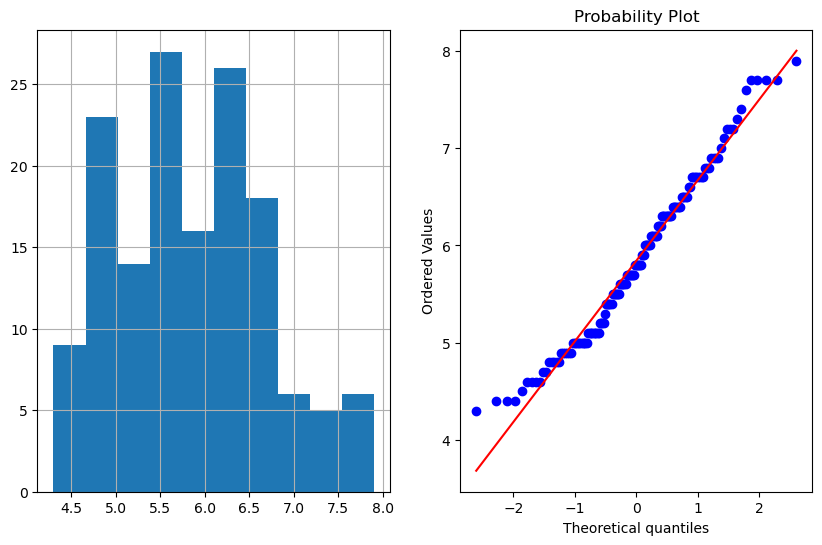

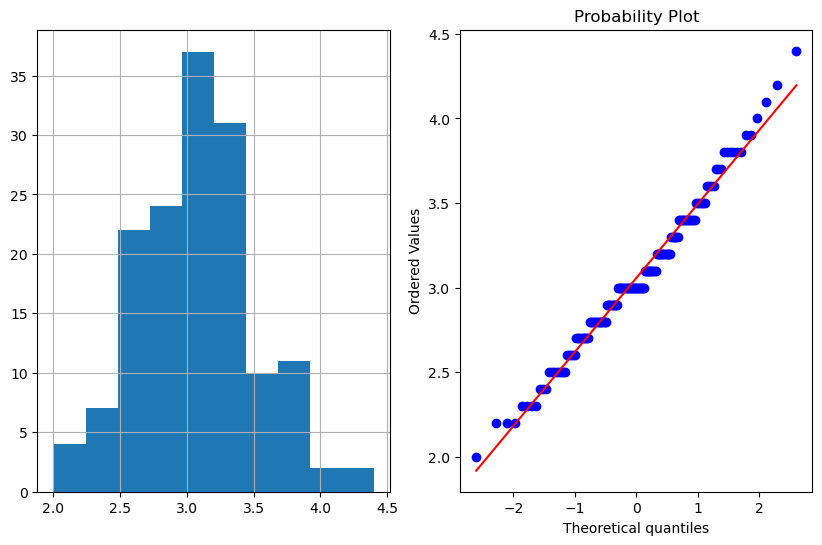

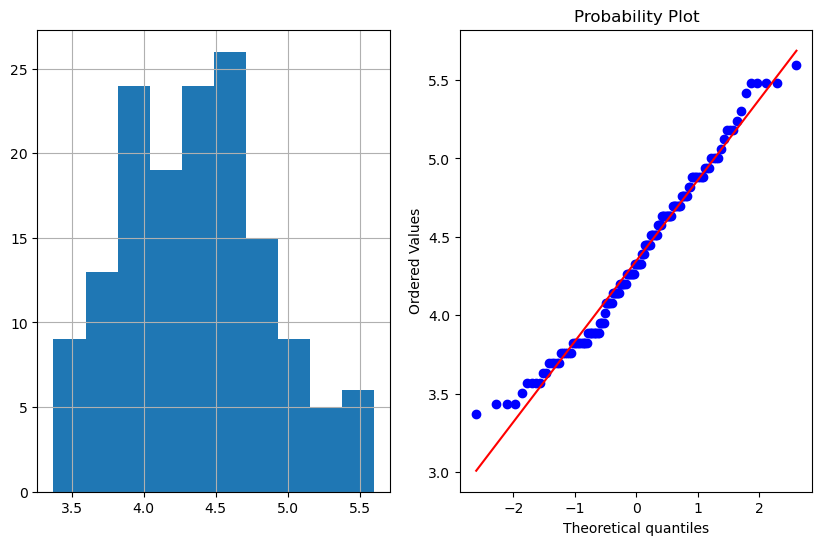

In [82]:
from sklearn.datasets import load_iris 
x = load_iris()
df = pd.DataFrame( x.data , columns = x.feature_names )
load_iris().feature_names
plot_data( df,'sepal length (cm)' ) 
plot_data( df ,'sepal width (cm)' )

## apply exponentioal transformatino 
df.loc[:,'sepal length (cm)'] = df['sepal length (cm)'] ** ( 1/1.2)
plot_data( df,'sepal length (cm)' ) 
 ## after applying transformation chek the QQ plot and then chek that 
    # perticuler transformation is good or not 